In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from yellowbrick.cluster import KElbowVisualizer
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer

from warnings import filterwarnings
filterwarnings("ignore")

In [2]:
df = pd.read_csv('Group_8_data_cleaned.csv')
df

,Class,User,X0,Y0,Z0,X1,Y1,Z1,X2,Y2,...,Z7,X8,Y8,Z8,X9,Y9,Z9,X10,Y10,Z10
0,1,0,54.263880,71.466776,-64.807709,76.895635,42.462500,-72.780545,36.621229,81.680557,...,1.356154,33.041242,100.140647,-1.077380,37.172842,87.562493,-10.663720,54.057026,76.311915,-27.775952
1,1,0,56.527558,72.266609,-61.935252,39.135978,82.538530,-49.596509,79.223743,43.254091,...,1.356154,33.041242,100.140647,-1.077380,37.172842,87.562493,-10.663720,54.057026,76.311915,-27.775952
2,1,0,55.849928,72.469064,-62.562788,37.988804,82.631347,-50.606259,78.451526,43.567403,...,1.356154,33.041242,100.140647,-1.077380,37.172842,87.562493,-10.663720,54.057026,76.311915,-27.775952
3,1,0,55.329647,71.707275,-63.688956,36.561863,81.868749,-52.752784,86.320630,68.214645,...,1.356154,33.041242,100.140647,-1.077380,37.172842,87.562493,-10.663720,54.057026,76.311915,-27.775952
4,1,0,55.142401,71.435607,-64.177303,36.175818,81.556874,-53.475747,76.986143,42.426849,...,1.356154,33.041242,100.140647,-1.077380,37.172842,87.562493,-10.663720,54.057026,76.311915,-27.775952
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78090,5,14,54.251127,129.177414,-44.252511,27.720784,107.810661,11.099282,-1.270139,122.758679,...,-53.126136,61.494952,101.205748,-6.543115,87.733364,61.216363,-48.713932,57.027873,78.677105,-32.567608
78091,5,14,54.334883,129.253842,-44.016320,27.767911,107.914808,11.069842,-30.334054,77.858214,...,-5.985371,61.523668,60.780642,-62.130563,78.229847,33.078407,-45.249543,57.027873,78.677105,-32.567608
78092,5,14,54.151540,129.269502,-44.173273,27.725978,108.034006,11.020347,-22.574718,104.222208,...,-62.718735,15.951786,98.089459,3.835904,78.591554,32.327738,-46.166556,57.027873,78.677105,-32.567608
78093,5,14,27.915311,108.007390,10.814957,-0.910435,122.464093,-47.271248,-30.084588,77.705861,...,3.394291,61.523668,60.050791,-63.221626,50.793322,91.949619,-30.884241,57.027873,78.677105,-32.567608


In [3]:
X = df.drop(["Class","User"],axis=1)
y = df["Class"]

In [4]:
col = X.columns
col

scaler = StandardScaler()

for column in col:
    scaler.fit(X[[column]])
    X[column] = scaler.transform(X[[column]])
X_scaled_df = X
X_scaled_df

,X0,Y0,Z0,X1,Y1,Z1,X2,Y2,Z2,X3,...,Z7,X8,Y8,Z8,X9,Y9,Z9,X10,Y10,Z10
0,0.119430,-0.360868,-1.013875,0.842876,-1.086360,-1.245109,-0.358176,-0.052358,-0.636731,1.091831,...,0.769501,-0.466986,0.580808,0.692839,-0.135872,0.435147,0.746727,-0.375455,-0.627695,0.791310
1,0.188942,-0.340860,-0.930227,-0.324104,-0.091983,-0.577943,0.912448,-0.992254,-1.122729,1.157718,...,0.769501,-0.466986,0.580808,0.692839,-0.135872,0.435147,0.746727,-0.375455,-0.627695,0.791310
2,0.168134,-0.335796,-0.948501,-0.359558,-0.089680,-0.607000,0.889416,-0.984590,-1.141983,1.139440,...,0.769501,-0.466986,0.580808,0.692839,-0.135872,0.435147,0.746727,-0.375455,-0.627695,0.791310
3,0.152157,-0.354852,-0.981296,-0.403658,-0.108601,-0.668771,1.124113,-0.381728,-1.186700,0.389898,...,0.769501,-0.466986,0.580808,0.692839,-0.135872,0.435147,0.746727,-0.375455,-0.627695,0.791310
4,0.146407,-0.361648,-0.995517,-0.415589,-0.116340,-0.689575,0.845711,-1.012488,-1.196563,1.125582,...,0.769501,-0.466986,0.580808,0.692839,-0.135872,0.435147,0.746727,-0.375455,-0.627695,0.791310
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78090,0.119038,1.082771,-0.415295,-0.676895,0.535076,1.168698,-1.488289,0.952397,-0.452762,-1.495835,...,-1.345964,1.699017,0.621432,0.442976,1.933665,-0.568483,-1.833526,0.692240,1.338311,-1.394754
78091,0.121610,1.084682,-0.408417,-0.675439,0.537661,1.167851,-2.355122,-0.145851,0.386253,-2.114789,...,0.484441,1.701203,-0.920385,-2.098163,1.544668,-1.640371,-1.598600,0.692240,1.338311,-1.394754
78092,0.115980,1.085074,-0.412987,-0.676735,0.540618,1.166426,-2.123699,0.499002,-0.665779,-2.336979,...,-1.718431,-1.767900,0.502576,0.917446,1.559473,-1.668968,-1.660784,0.692240,1.338311,-1.394754
78093,-0.689676,0.553200,1.188303,-1.561757,0.898661,-0.511029,-2.347682,-0.149577,0.373204,-0.645957,...,0.848639,1.701203,-0.948222,-2.148040,0.421639,0.602270,-0.624463,0.692240,1.338311,-1.394754


In [5]:
inertia = []

for k in range(1,16):
    km = KMeans(n_clusters=k, init="k-means++", max_iter=100, n_init=10)
    km.fit(X_scaled_df)
    inertia.append(km.inertia_)
inertia

[2577135.0,
 2297443.626353692,
 2183727.7112436695,
 2086879.7958630184,
 2010047.028714825,
 1956647.454862298,
 1911770.2804932715,
 1872633.424044302,
 1839988.4290415335,
 1806573.7360763568,
 1784279.9678588656,
 1760615.2685273455,
 1737958.3971659276,
 1721336.4362008683,
 1700379.2201475326]

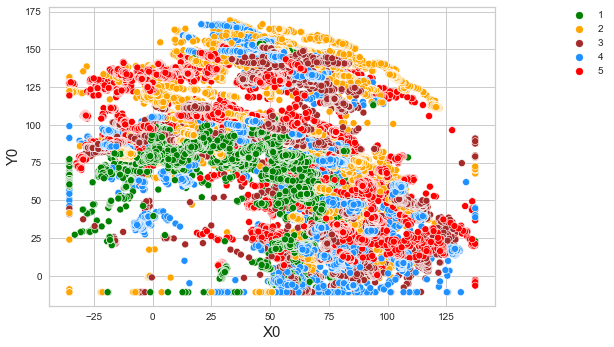

In [6]:
sns.scatterplot(data = X_scaled_df, x = 'X0', y='Y0', hue ='Class',palette=['green','orange','brown','dodgerblue','red'], legend='full')
plt.legend(bbox_to_anchor=(1.25, 1), borderaxespad=0)
plt.xlabel('X0', fontsize=15)
plt.ylabel('Y0', fontsize=15);

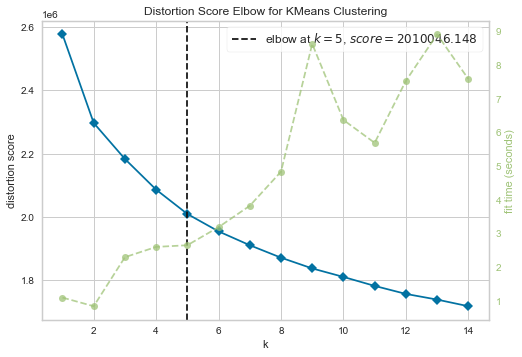

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [7]:
km = KMeans(random_state=42)
visualizer = KElbowVisualizer(km, k=(1,15))
 
visualizer.fit(X_scaled_df)
visualizer.show()

In [31]:
kmeans = KMeans(n_clusters=5, init="k-means++", max_iter=1000, n_init=10)
kmeans.fit(X_scaled_df)

KMeans(max_iter=1000, n_clusters=5)

In [32]:
cluster = kmeans.predict(X_scaled_df)
cluster

array([0, 0, 0, ..., 4, 4, 4])

In [33]:
kmeans.labels_

array([0, 0, 0, ..., 4, 4, 4])

In [13]:
sil = []
kmax = 10

for k in range(2, kmax+1):
    kmean = KMeans(n_clusters = k).fit(X_scaled_df)
    sil.append(silhouette_score(X_scaled_df, kmean.labels_, metric = 'euclidean'))

In [18]:
pca_= PCA(n_components=2, random_state =0)
pca_.fit(X_scaled_df)
pca_xnorm=pca_.transform(X_scaled_df)

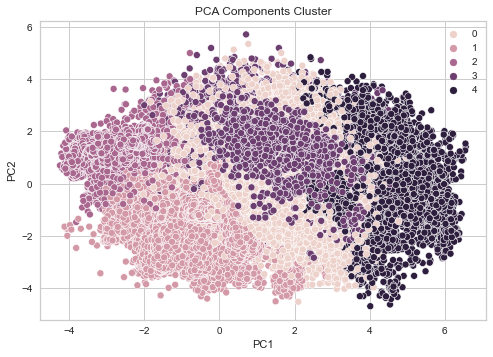

In [23]:
kmeans = KMeans(n_clusters = 5, init ='k-means++',max_iter =1000, n_init =10).fit(X_scaled_df)
sns.scatterplot(data=pca_xnorm,x=pca_xnorm[:,0],y=pca_xnorm[:,1],hue=kmeans.labels_)
plt.title('PCA Components Cluster')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

# Visualization of the clusters with two variables

In [5]:
X_2 = X_scaled_df[['X0', 'Y0']]

In [6]:
kmeans_2 = KMeans(n_clusters=5, init="k-means++", max_iter=1000, n_init=10)
kmeans_2.fit(X_2)

KMeans(max_iter=1000, n_clusters=5)

In [7]:
cluster = kmeans_2.predict(X_2)

In [8]:
kmeans_2.cluster_centers_

array([[ 0.16247735, -0.00432504],
       [ 1.3579988 , -1.01164918],
       [-1.43490028,  0.12479671],
       [ 0.12142131,  1.34282873],
       [ 0.30946808, -1.76358632]])

In [9]:
kmeans_2.inertia_

30142.44536067536

In [10]:
kmeans_2.score(X_2)

-30142.445360675363

In [11]:
kmeans_2.transform(X_2)


array([[0.35913243, 1.39913144, 1.62843874, 1.70369809, 1.41553264],
       [0.33757425, 1.34783178, 1.68929027, 1.68504237, 1.42782205],
       [0.33151906, 1.36841376, 1.66789211, 1.6792744 , 1.43476863],
       ...,
       [1.09039109, 2.43697748, 1.82410613, 0.25781193, 2.85522406],
       [1.0183317 , 2.57715441, 0.85958614, 1.13198621, 2.52305116],
       [1.01993032, 2.57885842, 0.86021241, 1.13086147, 2.52521675]])

In [12]:
silhouette_samples(X_2, kmeans_2.labels_)

array([0.6037532 , 0.60123588, 0.60818115, ..., 0.46289919, 0.06193854,
       0.06274555])

In [46]:
silhouette_score(X_2, kmeans_2.labels_)

0.4475891070436107

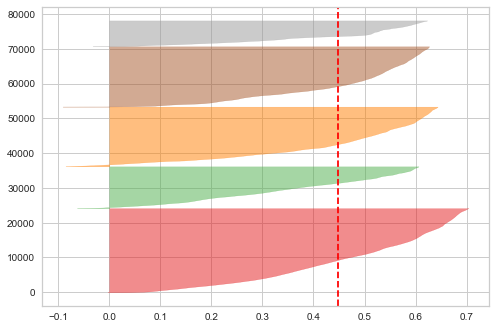

In [15]:
visualizer = SilhouetteVisualizer(kmeans_2)
visualizer.fit(X_2);

In [17]:
inertia_2 = []

for k in range(1,17):
    km = KMeans(n_clusters=k)
    km.fit(X_2)
    inertia_2.append(km.inertia_)

In [18]:
inertia_2

[156190.00000000017,
 84177.84132733056,
 53213.96778480724,
 37257.38812393823,
 30142.41336133864,
 24940.770167792503,
 20461.711158937065,
 17972.137823217967,
 15829.715953801851,
 14240.69567413044,
 12934.896792266505,
 11693.56019236404,
 10918.541227318345,
 9893.033272506063,
 9165.172691115382,
 8584.40445374618]

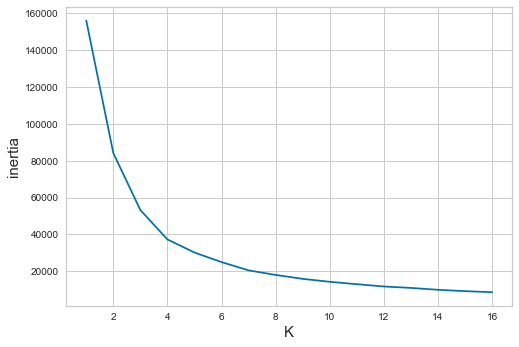

In [19]:
plt.plot(range(1,17), inertia_2)
plt.xlabel('K', fontsize=15)
plt.ylabel('inertia', fontsize=15);

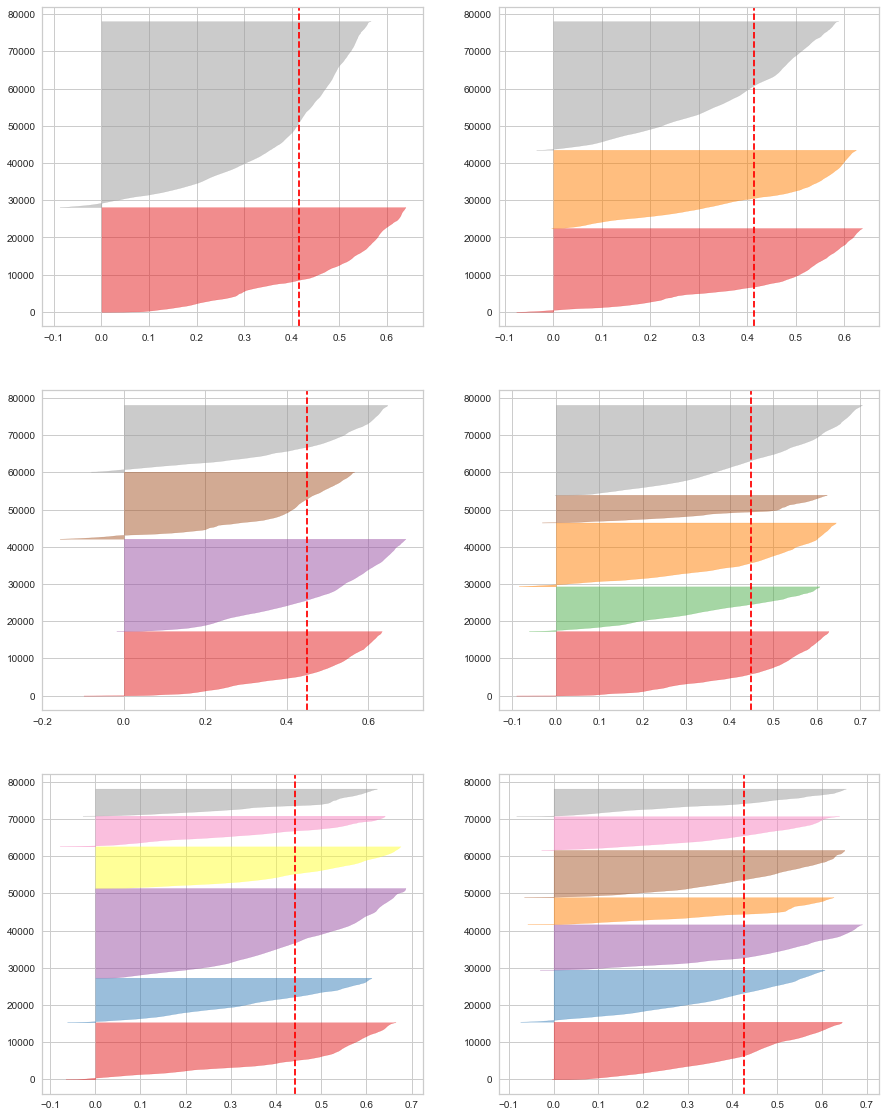

In [20]:
fig, ax = plt.subplots(3, 2, figsize=(15,20))
for k in range(2,8):
    km = KMeans(n_clusters=k)
    q, mod = divmod(k, 2)

    visualizer = SilhouetteVisualizer(km, ax=ax[q-1][mod])
    visualizer.fit(X_2)

In [41]:
cluster1 = kmeans_2.predict(X_2)

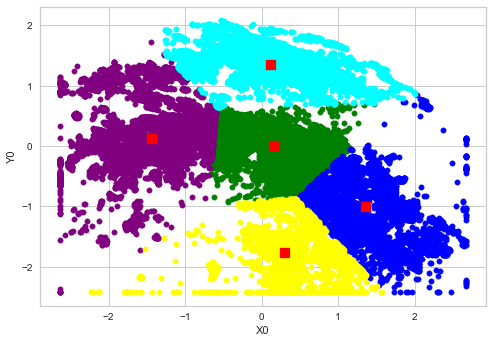

In [43]:
labels = [0, 1, 2, 3, 4]
# colors = ["green", "blue", "purple", "cyan", "yellow"]

for label, color in zip(labels, colors):
    index = cluster1==label
    plt.scatter(X_scaled_df.loc[index, "X0"],
                X_scaled_df.loc[index, "Y0"],
                c = color,
                s=30)
plt.scatter(kmeans_2.cluster_centers_[:,0], kmeans_2.cluster_centers_[:,1], color="red", marker="s", s=100);
plt.xlabel('X0')
plt.ylabel('Y0')
plt.show()